## www.bigrabbitdata.com

## Import 

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Generate dataset

In [40]:
centers = [[1, 0], [5, 0]]
X, y = datasets.make_blobs(random_state=5, centers=centers)

## Show datapoing

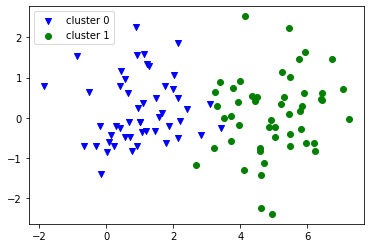

In [41]:
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='blue',
            marker='v',
            label='cluster 0')

plt.scatter(X[y == 1,0],
            X[y == 1,1],
            c='green',
            marker='o',
            label='cluster 1')
plt.legend(loc='upper left')
plt.show()

## Create Neural Net Model

### Xavier weight initialization

In [42]:
# Xavier weight initialization
def xavier(input_dim, output_dim):
    return np.random.uniform(-1, 1, (input_dim, output_dim)) * np.sqrt(6./(1+2))


In [43]:
# Define our model
def init_net_model(input_dim, output_dim):
    model = {}
    model['w'] = xavier(input_dim, output_dim)
    model['b'] = np.zeros((1, output_dim))
    return model

# retreiving our network parameters
def get_parameters(model):
    w = model['w']
    b = model['b']
    return w,b
  

## Forwardpass

In [44]:
# sigmoid function
def sigmoid(x):
   return 1/(1+np.exp(-x))


def forward(x, model):
    w, b = get_parameters(model)
    out = x.dot(w) + b
    prob = sigmoid(out)
    return prob

## Decision boundary

In [45]:
def plot_decision_boundary(X, y, model, e):
  # Plot the decision boundary
  # Determine grid range in x and y directions
  # x_span (50, 1)
  x_span = np.linspace(min(X[:, 0]), max(X[:, 0]))
  y_span = np.linspace(min(X[:, 1]), max(X[:, 1]))

  # XX (50, 50)
  XX, YY = np.meshgrid(x_span, y_span)

  # data (2500, 2)
  data = np.c_[XX.ravel(), YY.ravel()]

  # output (2500, 1)
  # get the predicted output from our model for each data point 
  output = np.where(forward(data, model) <0.5, 0, 1)
  Z = output.reshape(XX.shape)
  
  # clears an axes.
  plt.cla()

  plt.contourf(XX, YY, Z, cmap='spring')
  
  plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            c='blue',
            marker='v',
            label='cluster 0')

  plt.scatter(X[y == 1,0],
              X[y == 1,1],
              c='green',
              marker='o',
              label='cluster 1')
  plt.legend(loc='upper left')

  plt.savefig("%03d.png" % e)
  plt.pause(0.1)

## Binary cross entropy loss

In [46]:
def bceloss(prob, y):
    loss = y*np.log(prob) + (1-y) * np.log(1-prob)
    return - np.mean(loss)

## Backpropagation

In [47]:
def backpropagation(x, y, epochs, model):
    learning_rate = 0.01
    
    # for displaying matplot graphs
    plt.ion()
    
    for e in range(epochs):
        w, b = get_parameters(model)
        
        prob = forward(x, model)    # prob.shape [100, 1]
    
        # add 1 more dimension to y to match with prob.shape
        copy_y = np.expand_dims(y, axis=1)
        
        # Calculate each derivative
        dprob = (-copy_y/prob) + (1-copy_y)/(1-prob)     
        dout = prob * (1-prob)                  #  dout.shape [100, 1]
        #   x tranpose.shape[2, 100]
        #  [2, 100] dot [100, 1]    ===> [2, 1]
        dw = np.dot(x.T, dprob * dout)          #  dw.shape [2, 1]
        dbias = np.sum(dprob * dout, axis=0)
               
        #update weights: w = w + (learning_rate * - gradient)
        w -= learning_rate * dw
        b -= learning_rate * dbias
        
        #update the model 
        model = {'w': w, 'b': b}
        
        if e % 1 == 0:
            plot_decision_boundary(X, y, model, e)
            print("Loss at epoch {} is: {:.3f}".format(e+1,bceloss(prob,copy_y)))

## Init model

In [48]:
# input_dim = 1, output_dim = 1
model = init_net_model(2, 1)
print (get_parameters(model))

(array([[-1.17863309],
       [-0.48163077]]), array([[0.]]))


## Training our network

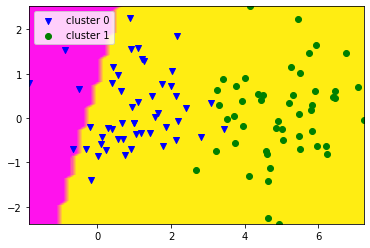

Loss at epoch 1 is: 3.151


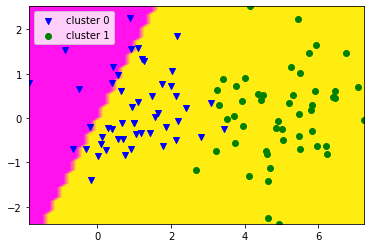

Loss at epoch 2 is: 0.929


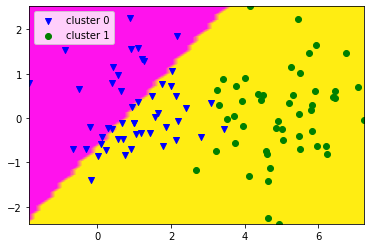

Loss at epoch 3 is: 0.599


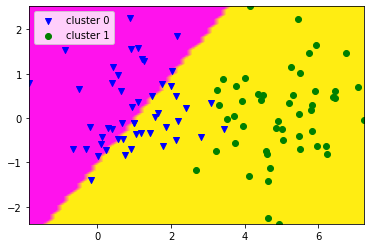

Loss at epoch 4 is: 0.457


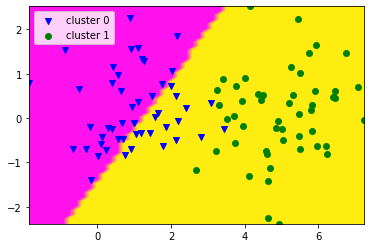

Loss at epoch 5 is: 0.424


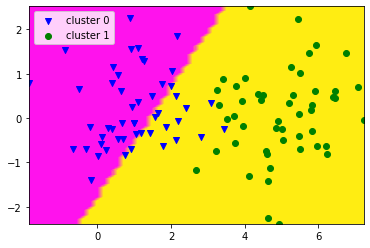

Loss at epoch 6 is: 0.396


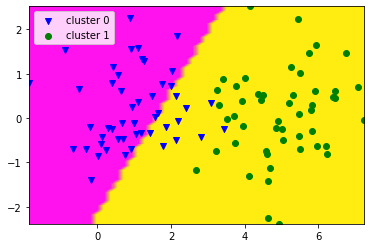

Loss at epoch 7 is: 0.372


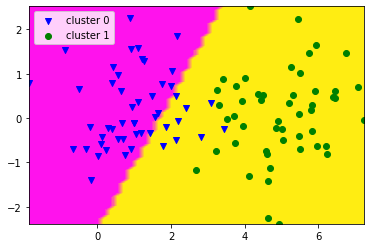

Loss at epoch 8 is: 0.350


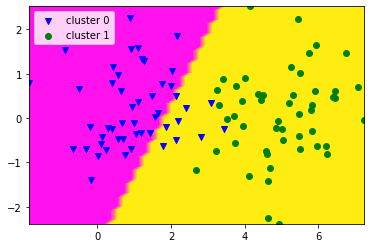

Loss at epoch 9 is: 0.332


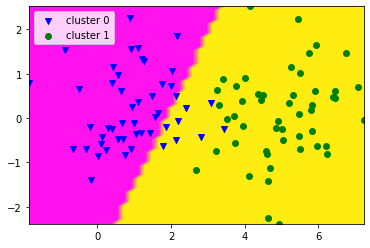

Loss at epoch 10 is: 0.315


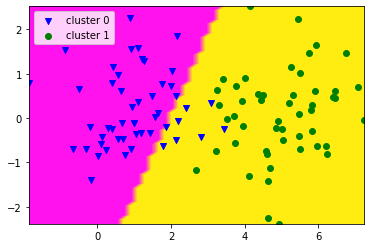

Loss at epoch 11 is: 0.301


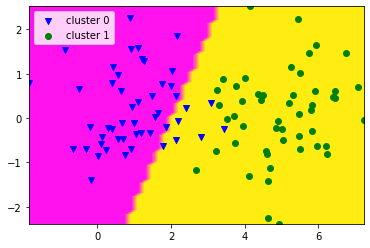

Loss at epoch 12 is: 0.288


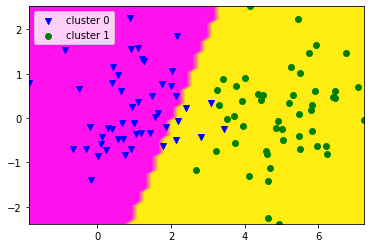

Loss at epoch 13 is: 0.277


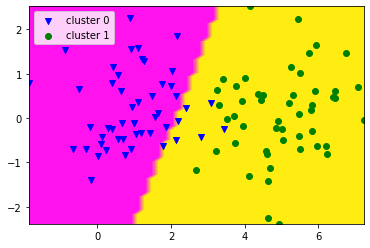

Loss at epoch 14 is: 0.267


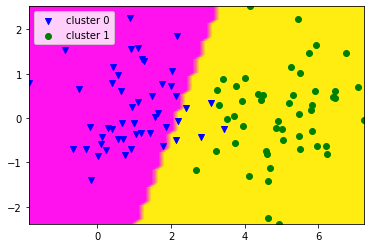

Loss at epoch 15 is: 0.257


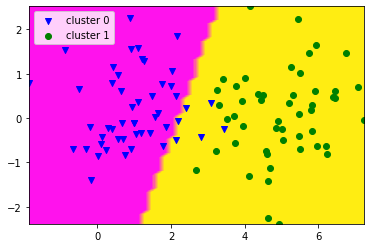

Loss at epoch 16 is: 0.249


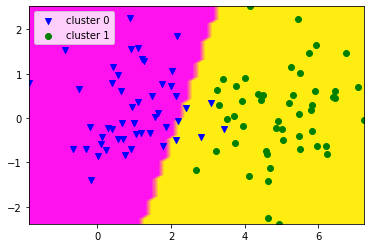

Loss at epoch 17 is: 0.241


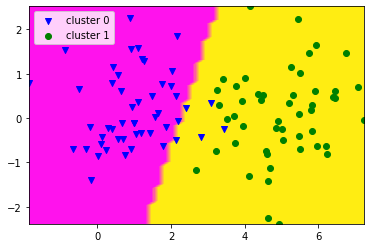

Loss at epoch 18 is: 0.234


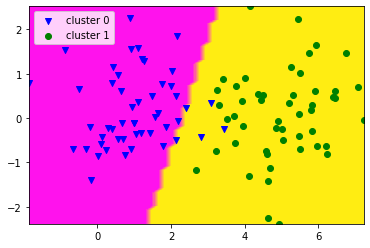

Loss at epoch 19 is: 0.228


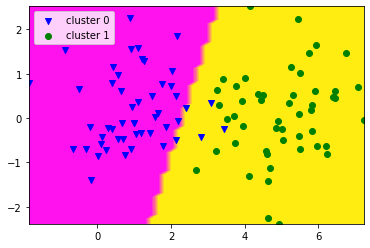

Loss at epoch 20 is: 0.222


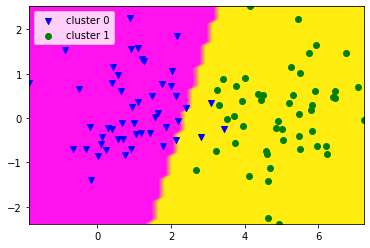

Loss at epoch 21 is: 0.216


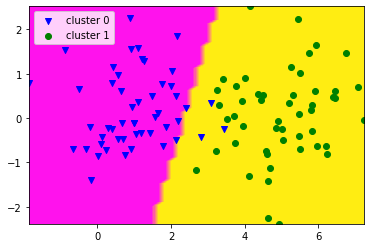

Loss at epoch 22 is: 0.211


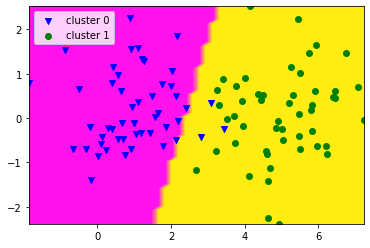

Loss at epoch 23 is: 0.206


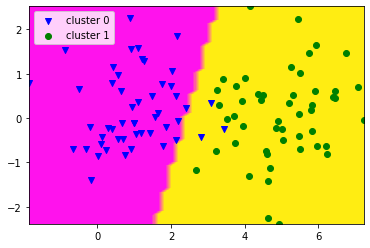

Loss at epoch 24 is: 0.202


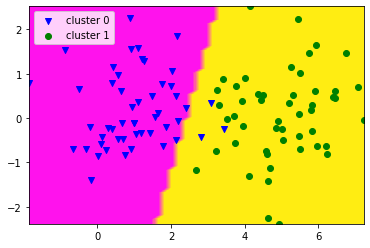

Loss at epoch 25 is: 0.198


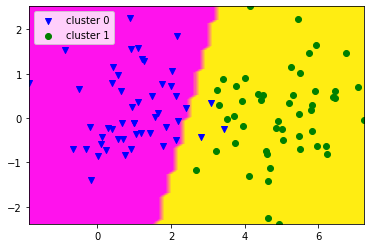

Loss at epoch 26 is: 0.194


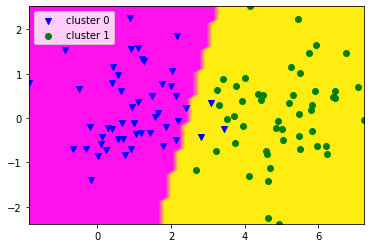

Loss at epoch 27 is: 0.190


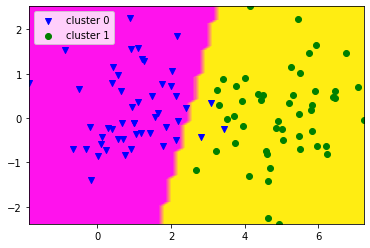

Loss at epoch 28 is: 0.187


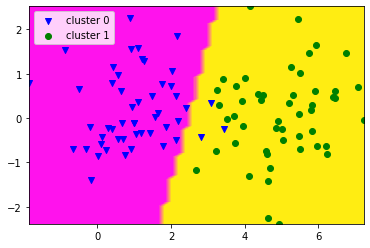

Loss at epoch 29 is: 0.184


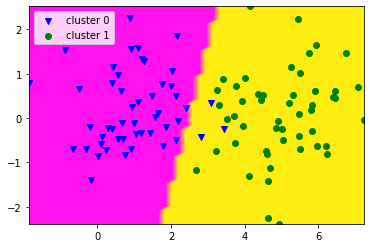

Loss at epoch 30 is: 0.181


In [49]:
# training for 30 epochs
backpropagation(X, y, 30, model)

In [50]:
# create gif, 3 frames per second
import subprocess, os, glob

subprocess.call([
    'ffmpeg', '-framerate', '3', '-i', \
    '%03d.png', 'pytorch16-output.gif'
])

# remove saved png
for file in glob.glob('*.png'):
    os.remove(file)